## Pre-Processing of Wave files

### TODO:
current: have a wavfile
1. load a wavefile and play it(maybe)
2. Do basic preprocessing, find a transform, make spectrograms
3. Create and save images? Set them up for Resnet
4. Lay out the pipeline for training?

### Want to Use basic Scipy Process
https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

In [45]:
from scipy.io import wavfile
import scipy.io as sio

In [41]:
wav_fname = './data/pump/id_00/normal/00000000.wav'

In [30]:
#ls data/pump/id_00

In [42]:
samplerate, data = wavfile.read(wav_fname)

In [40]:
data.shape # numpy array

(160000, 8)

### Visualization
Straigh from Scipy docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

First pull basic attributes of each file

In [66]:
samplerate, data = sio.wavfile.read(wav_fname)
print(f"sample rate = {samplerate}")
print(f"array length(number of samples) = {data.shape[0]}")
print()
print(f"number of channels = {data.shape[1]}")
length = data.shape[0] / samplerate # samples/sample_rate = time
print(f"length = {length}s")



sample rate = 16000
array length(number of samples) = 160000

number of channels = 8
length = 10.0s


### Basic Stats
- sampling rate is 1.6 KHz
- length of time is 10.0s
- there are 8 channels

#### Basic Waveform Plot
Can look at 1 or 8 channels at once

In [83]:
import matplotlib.pyplot as plt
import numpy as np

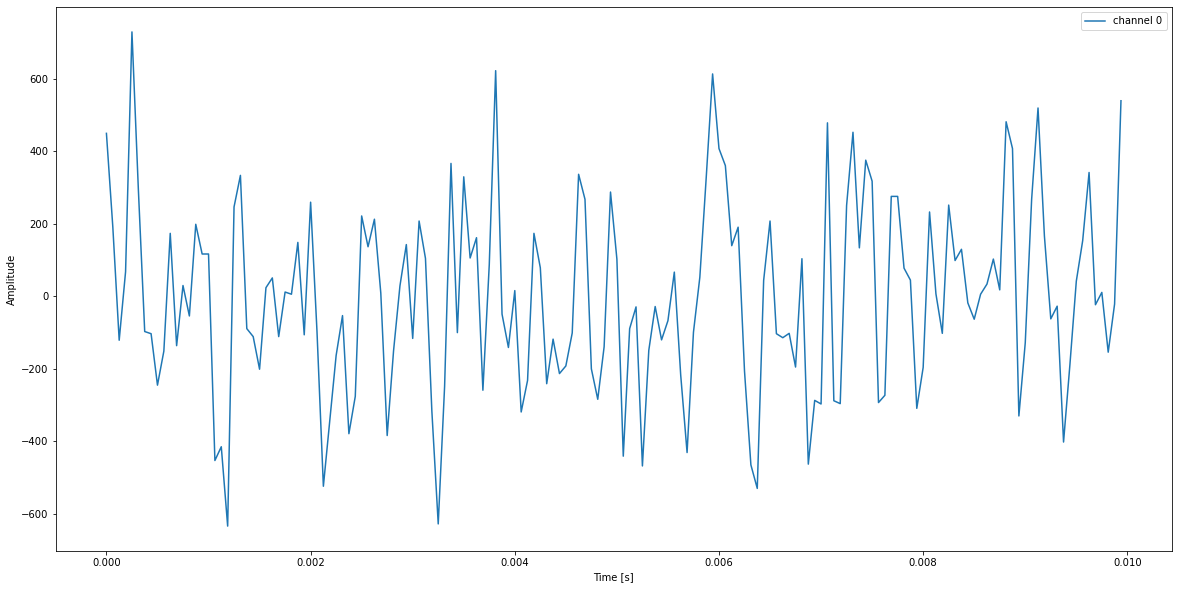

In [89]:
chunk = data.shape[0]//1000 # take 1/100 second chunk

time = np.linspace(0., length, data.shape[0])
plt.figure(figsize=(20, 10))
#for i in range(8):
#    plt.plot(time[:chunk], data[:chunk, i], label="channel " + str(i)) 
plt.plot(time[:chunk], data[:chunk, 0], label="channel " + str(0))
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

The data seems really dense. Looking at either all 8 channels or just 1, the signal seems really jagged, despite the 1.6 kHz sampling rate.

## Basic Transform
Apparently spectrogram is just the general term for making a visual representation of audio.
Basic research says find a way to use FFT on these files. I also have suggestions on basic transforms from professionals.
1. FFT
2. Hilbert Transform

### FFT Spectrogram from Scipy
Compute a separate spectrogram for each channel

In [71]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

In [73]:
signal.spectrogram?

In [80]:
data.shape

(160000, 8)

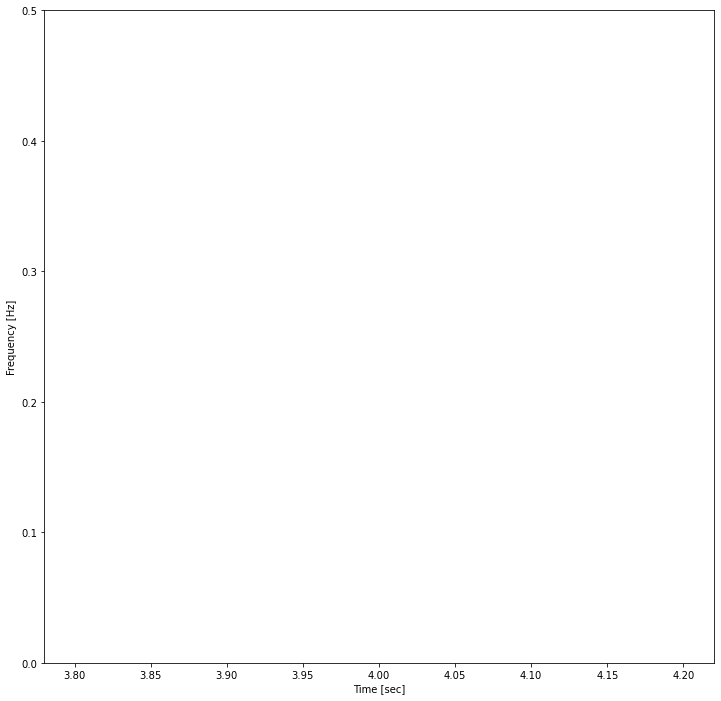

In [77]:
freqs, time_segs, spectro_array = signal.spectrogram(data[0])
plt.figure(figsize=(12, 12))
plt.pcolormesh(time_segs, freqs, spectro_array)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()